In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from pathlib import Path

DATASETS_DIR = "./Datasets/Foods/"

classnames = []

for path in Path(DATASETS_DIR).iterdir():
    if path.is_dir():
        classnames.append(str(path).split("\\")[-1])

print(classnames)

['Banh beo', 'Banh bot loc', 'Banh can', 'Banh canh', 'Banh chung', 'Banh cuon', 'Banh duc', 'Banh gio', 'Banh khot', 'Banh mi', 'Banh pia', 'Banh tet', 'Banh trang nuong', 'Banh xeo', 'Bun bo Hue', 'Bun dau mam tom', 'Bun mam', 'Bun rieu', 'Bun thit nuong', 'Ca kho to', 'Canh chua', 'Cao lau', 'Chao long', 'Com tam', 'Goi cuon', 'Hu tieu', 'Mi quang', 'Nem chua', 'Pho', 'Xoi xeo']


In [3]:
X = []
y = []

for i in range(len(classnames)):
    print(classnames[i])
    images = list(Path(DATASETS_DIR + classnames[i]).glob("*"))
    for image in range(int(0.4 * len(images))):
        img = cv2.imread(str(images[image]))
        img = cv2.resize(img, (128, 128))
        img = img.astype("float32")
        img = img / 255
        X.append(img)
        y.append(i)

Banh beo
Banh bot loc
Banh can
Banh canh
Banh chung
Banh cuon
Banh duc
Banh gio
Banh khot
Banh mi
Banh pia
Banh tet
Banh trang nuong
Banh xeo
Bun bo Hue
Bun dau mam tom
Bun mam
Bun rieu
Bun thit nuong
Ca kho to
Canh chua
Cao lau
Chao long
Com tam
Goi cuon
Hu tieu
Mi quang
Nem chua
Pho
Xoi xeo


In [4]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2)

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5617, 128, 128, 3)
(1405, 128, 128, 3)
(5617, 30)
(1405, 30)


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


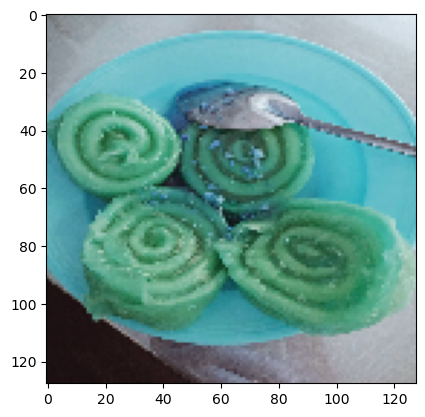

In [5]:
plt.imshow(X_train[2])
print(y_train[2])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="Same",
                 activation="relu", input_shape=X_train[0].shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(filters=96, kernel_size=(3, 3), padding="Same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dense(y_train.shape[1], activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam",
              metrics=["accuracy"])
model.summary()

history = model.fit(X_train, y_train, epochs=30, batch_size=128, verbose=2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 96)        55392     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 96)       0

In [66]:
model.evaluate(X_train, y_train)

176/176 [==============================] - 43s 241ms/step - loss: 0.0023 - accuracy: 0.9996


[0.0022927613463252783, 0.9996439218521118]

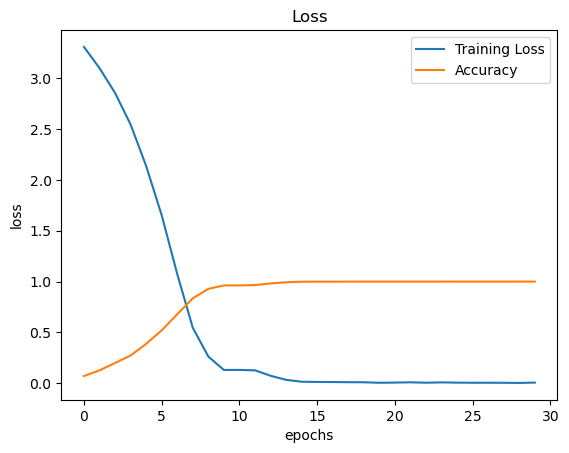

In [75]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["accuracy"], label="Accuracy")
plt.title("Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

(128, 128, 3)
1/1 [==============================] - 0s 75ms/step
Predict: Canh chua
True Label: Canh chua


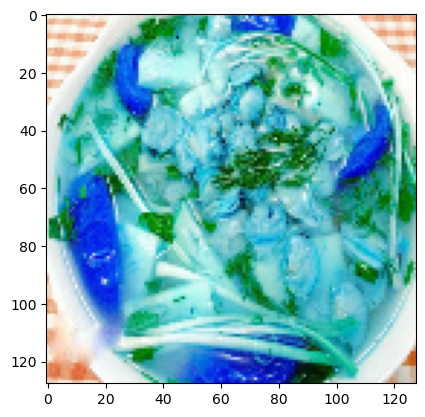

In [37]:
n = 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 136ms/step
Predict: Ca kho to
True Label: Ca kho to


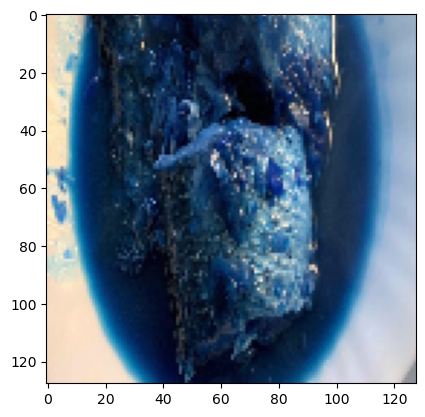

In [38]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 103ms/step
Predict: Banh mi
True Label: Banh mi


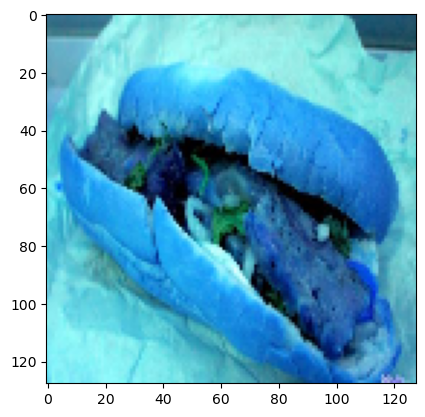

In [51]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 58ms/step
Predict: Goi cuon
True Label: Goi cuon


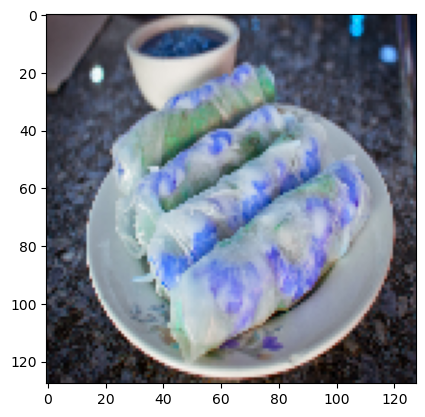

In [74]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 56ms/step
Predict: Com tam
True Label: Com tam


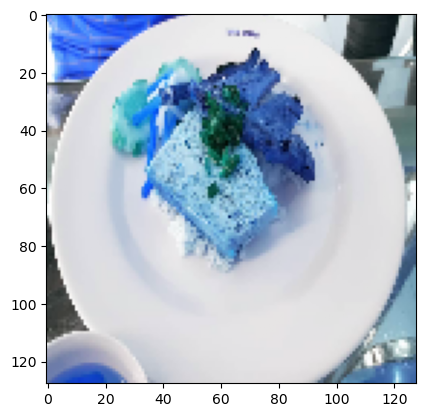

In [54]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 90ms/step
Predict: Bun bo Hue
True Label: Bun bo Hue


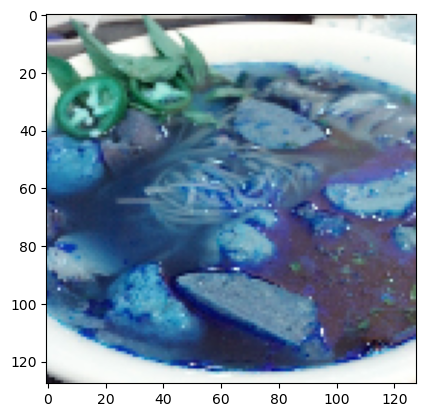

In [73]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 67ms/step
Predict: Banh xeo
True Label: Banh xeo


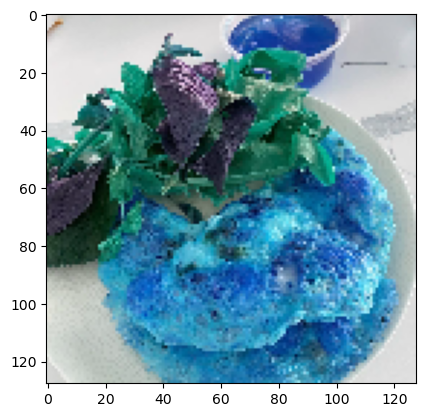

In [43]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 84ms/step
Predict: Canh chua
True Label: Canh chua


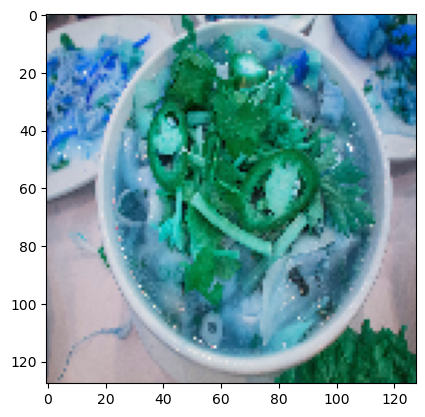

In [60]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 82ms/step
Predict: Banh mi
True Label: Banh mi


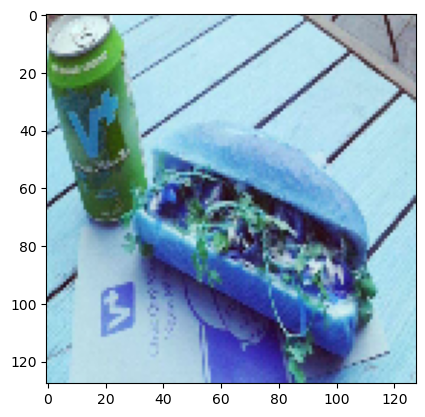

In [62]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 41ms/step
Predict: Pho
True Label: Pho


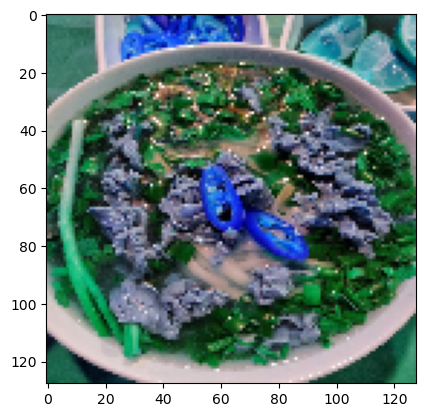

In [63]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])

(128, 128, 3)
1/1 [==============================] - 0s 64ms/step
Predict: Banh can
True Label: Banh can


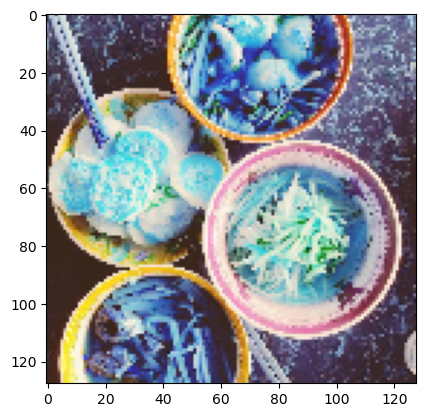

In [64]:
n += 1
print(X_test[n].shape)
plt.imshow(X_test[n])
predict = model.predict(X_test[n].reshape(1, 128, 128, 3))
print("Predict:", classnames[predict.argmax()])
print("True Label:", classnames[y_test[n].argmax()])